In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('../data/loan_data_2007_2014.csv')

In [4]:
pd.options.display.max_columns = None
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
304825,26228161,28711146,6000,6000,6000.0,36 months,8.39,189.10,A,A5,Sr Accounting Information Specialist,10+ years,MORTGAGE,97000.0,Not Verified,Sep-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,221xx,VA,14.23,0.0,Feb-93,0.0,38.0,NaN,11.0,0.0,8971,58.3,43.0,f,0.00,0.00,6486.35000,6486.35,6000.00,486.35,0.0,0.0,0.0,Oct-15,4217.15,NaN,Nov-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,279255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15400.0,NaN,NaN,NaN
118462,6125661,7607837,28000,28000,28000.0,36 months,7.90,876.13,A,A4,Bally Technologies Inc.,7 years,MORTGAGE,98600.0,Verified,Jul-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,debt consl and home improv,890xx,NV,3.19,0.0,Apr-92,2.0,47.0,NaN,11.0,0.0,16203,25.6,23.0,f,5977.31,5977.31,25404.20000,25404.20,22022.69,3381.51,0.0,0.0,0.0,Dec-15,876.13,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,379723.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104409.0,NaN,NaN,NaN
440144,12254919,14247069,12825,12825,12825.0,36 months,14.16,439.33,C,C2,Branch Manager,7 years,OWN,63000.0,Verified,Feb-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 02/19/14 > Refinance curre...,credit_card,Credit card refinancing,900xx,CA,14.30,1.0,Dec-02,0.0,7.0,NaN,11.0,0.0,9492,59.0,24.0,f,5638.73,5638.73,9665.26000,9665.26,7186.27,2478.99,0.0,0.0,0.0,Dec-15,439.33,Feb-16,Jan-16,0.0,7.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,31990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16100.0,NaN,NaN,NaN
17890,709425,902045,8000,8000,8000.0,36 months,13.06,269.79,C,C2,Jack in the Box Inc,10+ years,MORTGAGE,117000.0,Verified,Mar-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 03/22/11 > I have been wor...,other,Credit P.,921xx,CA,11.22,1.0,Nov-96,3.0,10.0,NaN,11.0,0.0,31331,90.3,26.0,f,0.00,0.00,9290.59000,9290.59,8000.01,1290.58,0.0,0.0,0.0,Nov-12,4443.82,NaN,Nov-12,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337063,21650700,23973657,16750,16750,16750.0,36 months,13.35,567.21,C,C2,Policy Service Coordinator,9 years,MORTGAGE,40000.0,Source Verified,Jul-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,450xx,OH,12.73,0.0,Aug-00,1.0,NaN,NaN,18.0,0.0,19212,43.4,26.0,f,9665.68,9665.68,9642.57000,9642.57,7084.32,2558.25,0.0,0.0,0.0,Dec-15,567.21,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,112994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44300.0,NaN,NaN,NaN
364304,19556239,21778995,25000,25000,25000.0,60 months,14.99,594.62,C,C5,Bus Operator,8 years,RENT,69525.6,Source Verified,Jun-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,116xx,NY,23.38,0.0,Mar-02,0.0,48.0,NaN,12.0,0.0,17434,48.7,29.0,w,19340.80,19340.80,10703.16000,10703.16,5659.20,5043.96,0.0,0.0,0.0,Dec-15,594.62,Feb-16,Jan-16,0.0,48.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,51101.0,Na

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [7]:
# Get a list of columns that have more than 80% of the values missing
null_values = data.isnull().mean()
null_values[null_values > 0.8]

mths_since_last_record       0.865666
annual_inc_joint             1.000000
dti_joint                    1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
total_bal_il                 1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
inq_last_12m                 1.000000
dtype: float64

In [8]:
data.mths_since_last_record.describe()

count    62638.000000
mean        74.306012
std         30.357653
min          0.000000
25%         53.000000
50%         76.000000
75%        102.000000
max        129.000000
Name: mths_since_last_record, dtype: float64

In [9]:
data.loan_status.value_counts() 

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [10]:
data.loan_status.value_counts(normalize=True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

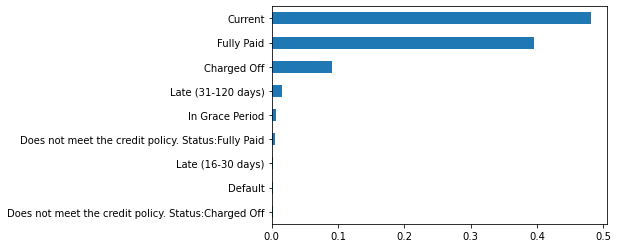

In [11]:
# Plot it as a bar chart
data.loan_status.value_counts(normalize=True).sort_values().plot(kind='barh')
plt.show()

In [12]:
data.loan_status

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
466280        Current
466281    Charged Off
466282        Current
466283     Fully Paid
466284        Current
Name: loan_status, Length: 466285, dtype: object